# Linear Regression in Python

In [21]:
import pandas as pd
import numpy as np

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [23]:
df=pd.read_csv("USA_Housing.csv") #To load data from the csv file
df.head()                         #view data in dataframe

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [24]:
df.info()                          #information on data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg_Area_Income                5000 non-null float64
Avg_Area_House_Age             5000 non-null float64
Avg_Area_Number_of_Rooms       5000 non-null float64
Avg_Area_Number_of_Bedrooms    5000 non-null float64
Area_Population                5000 non-null float64
Price                          5000 non-null float64
Address                        5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [25]:
df.isnull().sum()                 #to check whether any null values present in the data frame

Avg_Area_Income                0
Avg_Area_House_Age             0
Avg_Area_Number_of_Rooms       0
Avg_Area_Number_of_Bedrooms    0
Area_Population                0
Price                          0
Address                        0
dtype: int64

In [26]:
df.describe()                     # gives statistical information

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


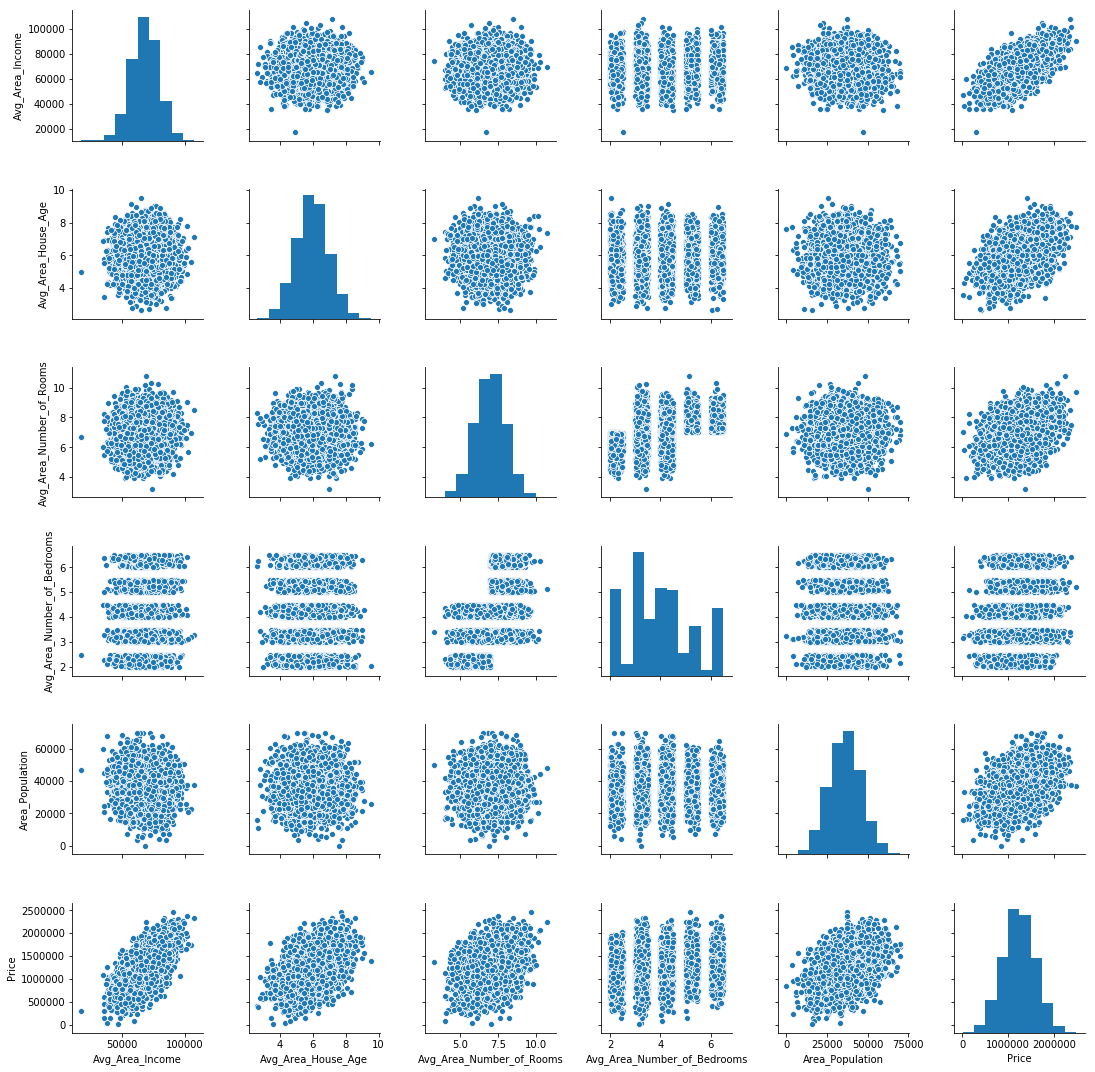

In [27]:
sns.pairplot(df)                # to get a view how data is distributed (Histograms and scatter plots)

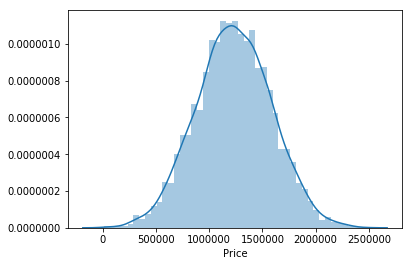

In [28]:
sns.distplot(df['Price'])       #To know where the mean and extreme values of target variable 

In [29]:
df.corr()                       # to check collinearity in numerical values in data

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
Avg_Area_Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg_Area_House_Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg_Area_Number_of_Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg_Area_Number_of_Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area_Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


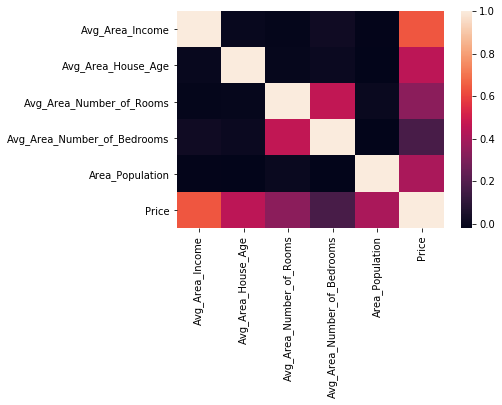

In [30]:
sns.heatmap(df.corr())  #to check multi linear collinearity

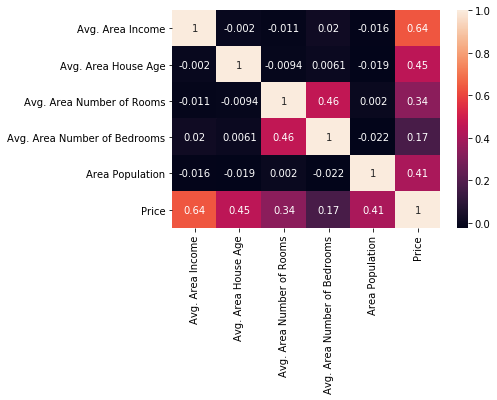

In [17]:
sns.heatmap(df.corr(),annot=True)  #to check multi linear collinearity with values

In [33]:
df.columns                      # to view What are the features in data 

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price', 'Address'],
      dtype='object')

# Divide data into independant and dependant(Target) variables 

In [35]:
X=df[['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population']]  

In [36]:
y=df['Price']

# Split data into Training and Testing sets  

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Importing Linear Regression from Scikit klearn

In [39]:
from sklearn.linear_model import LinearRegression 

In [41]:
lm=linear_model.LinearRegression()

# training model

In [42]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print('Intercept: \n', lm.intercept_) #finding intercept in Linear Regression
print('Coefficients: \n', lm.coef_)   #finding coefiicients in Linear Regtression

Intercept: 
 -2640159.796813773
Coefficients: 
 [2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [46]:
X_train.columns               # what are columns in training set

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population'],
      dtype='object')

In [48]:
#converting all Coefficients into a data frame
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])  
cdf

,coeff
Avg_Area_Income,21.528276
Avg_Area_House_Age,164883.282027
Avg_Area_Number_of_Rooms,122368.678023
Avg_Area_Number_of_Bedrooms,2233.801864
Area_Population,15.150420


# Preictions

In [51]:
predictions=lm.predict(X_test)
predictions

array([1260960.70581767,  827588.75544636, 1742421.24257437, ...,
        372191.40613006, 1365217.15136995, 1914519.54191761])

In [52]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
2866    7.300436e+05
2371    1.166925e+06
2952    7.054441e+05
45      1.499989e+06
4653    1.288199e+06
891     1.441737e+06
3011    1.279681e+06
335     1.754969e+06
3050    1.511653e+06
3850    1.441956e+06
834     1.119993e+06
3188    7.278665e+05
4675    1.138885e+06
2564    1.074263e+06
1866    1.386473e+06
1492    4.046436e+05
3720    1.449829e+06
618     1.775875e+06
3489    1.202051e+06
2145    1.105737e+06
3200    1.835565e+06
4752    1.795429e+06
602     1.424283e+06
4665    1.365945e+06
79      1.492011e+06
            ...     
4668    1.537865e+06
3762    4.269062e+05
236     8.090897e+05
4897    1.169265e+06
1283    9.809832e+05
2443    5.491679e+05
3600    8.238644e+05
2138    1.467960e+06
254     8.224317e+05
3987    1.550931e+06
527     1.293747e+06
1362    7.582626e+05
4577    1.479063e+06
2642    1.759180e+06
4297    1.864670e+06
1114    1.569122e+06
1041    1.610

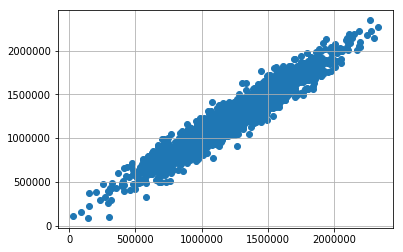

In [55]:
plt.scatter(y_test,predictions)
plt.grid()   

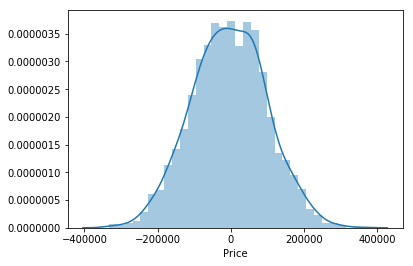

In [56]:
sns.distplot((y_test-predictions))

By observing the above scatter plot and histogram we can say our model predicted house prices very well  

# Regression Evaluation Metrics

In [57]:
from sklearn import metrics

In [58]:
metrics.mean_absolute_error(y_test,predictions)

82288.22250721788

In [59]:
metrics.mean_squared_error(y_test,predictions)

10460958905.7747

In [60]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82921589736

# Predicting the outcome with a new value

In [49]:
# prediction with sklearn
Avg_Area_Income=79540
Avg_Area_House_Age=5.5
Avg_Area_Number_of_Rooms=7
Avg_Area_Number_of_Bedrooms=4
Area_Population=23080
predict_outcome = lm.predict([[Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,
       Avg_Area_Number_of_Bedrooms,Area_Population]])
    
print(predict_outcome)

[1194244.93674724]
